In [1]:
import pandas as pd

In [5]:
ds = pd.read_csv(r"D:\Projects\SummerDir\datasets\Wine.csv")

In [6]:
ds.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
y = ds["Class"]

In [8]:
type(y)

pandas.core.series.Series

In [9]:
#aggregate :counting
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [11]:
y_cat = pd.get_dummies(y)

In [12]:
ds.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [13]:
X = ds.drop("Class", axis=1)

In [14]:
X.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Alcohol', ylabel='Class'>

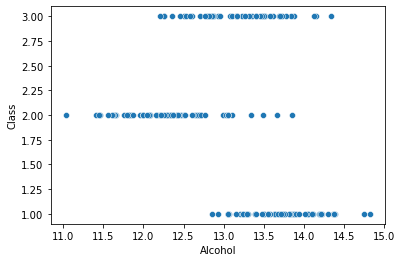

In [16]:
sns.scatterplot(x="Alcohol",y="Class",data=ds)

In [19]:
from keras.models import Sequential

In [20]:
model = Sequential()

In [21]:
from keras.layers import Dense

In [22]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [23]:
model.add(
    Dense(units=5,input_shape=(13,),activation="relu",kernel_initializer="he_normal")
)

In [25]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 70        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(
    Dense(units=8,activation="relu",kernel_initializer="he_normal")
)

In [29]:
model.add(
    Dense(units=8,activation="relu",kernel_initializer="he_normal")
)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 70        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [31]:
# In output layer we need as much neuron as we have total no of class
model.add(
    Dense(units=3,activation="softmax")
)

In [32]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 13),
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name':

In [35]:
import tensorflow as tf
abc=tf.keras.optimizers.RMSprop()

In [38]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])

In [39]:
model.fit(X,y_cat,epochs=100)

Epoch 1/100
6/6 [==============================] - 54s 4ms/step - loss: 152.4904 - accuracy: 0.3642
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 101.0545 - accuracy: 0.4014
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 75.3317 - accuracy: 0.3816
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 44.2963 - accuracy: 0.4133
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 21.1427 - accuracy: 0.3886
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 5.4418 - accuracy: 0.2684
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 2.9351 - accuracy: 0.2801
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 1.5998 - accuracy: 0.2603
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4845 - accuracy: 0.3790
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 1.8702 - accuracy: 0.3899
Epoch 11/100
6/6 [===

6/6 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7841
Epoch 85/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7720 - accuracy: 0.7010
Epoch 86/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5975 - accuracy: 0.7567
Epoch 87/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7071 - accuracy: 0.7115
Epoch 88/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6786 - accuracy: 0.7107
Epoch 89/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5311 - accuracy: 0.7869
Epoch 90/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0694 - accuracy: 0.5994
Epoch 91/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5642 - accuracy: 0.7612
Epoch 92/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.7600
Epoch 93/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.6647
Epoch 94/100
6/6 [===============

In [45]:
l = model.history.history['loss']

In [46]:
l = pd.DataFrame(l)

<AxesSubplot:>

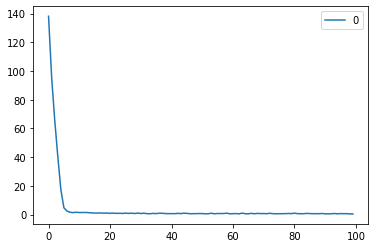

In [47]:
l.plot()

In [52]:
a = model.history.history['accuracy']

In [53]:
a = pd.DataFrame(a)

<AxesSubplot:>

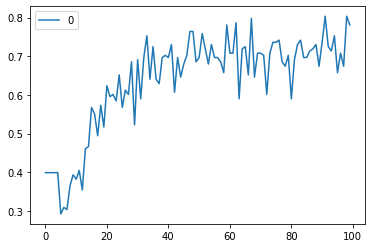

In [54]:
a.plot()